# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [4]:
!pip install scikit-learn-extra

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
import warnings

warnings.filterwarnings("ignore")

### **Loading the data**

In [7]:
# Importing the excel and checking the head.
df = pd.read_excel('Credit+Card+Customer+Data.xlsx')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Overview**

- Observations
- Sanity checks




In [9]:
# Checking the overall structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
# Checking for null values.
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [11]:
# Checking for duplicated rows.
df.duplicated().sum()

0

In [12]:
# Logically, SI_No and Customer Key should serve the same function. Checking to see if they have the same number of unique values.
print(df['Sl_No'].nunique())
print(df['Customer Key'].nunique())

660
655


In [13]:
# There is a different number when it should be the same. Checking Customer Key for duplicates as it has less values.
df['Customer Key'].duplicated().sum()

5

In [14]:
# Dropping one of the duplicated rows.
df = df.drop_duplicates(subset = ['Customer Key'])

In [15]:
# Checking if duplicates were properly dropped.
df.shape

(655, 7)

In [16]:
# Dropping unnecessary columns.
df.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [17]:
# Rechecking duplicated rows.
df.duplicated().sum()

11

In [18]:
# Droppping duplicated rows
df = df.drop_duplicates()

In [19]:
# Checking if duplicates were properly dropped.
df.shape

(644, 5)

## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

#### **Check the summary Statistics**

In [23]:
# Checking summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


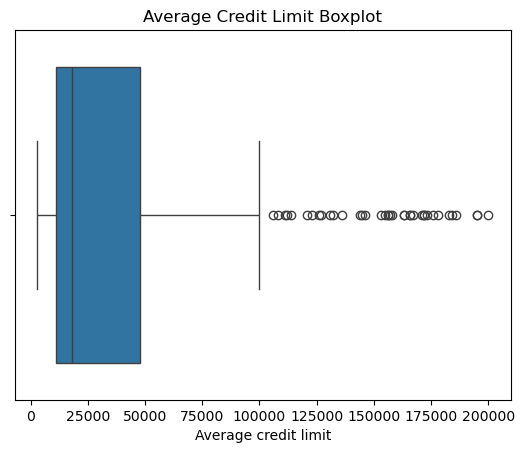

In [24]:
# Boxplot for average credit limit.
sns.boxplot(data = df, x = 'Avg_Credit_Limit')
plt.title('Average Credit Limit Boxplot')
plt.xlabel('Average credit limit');

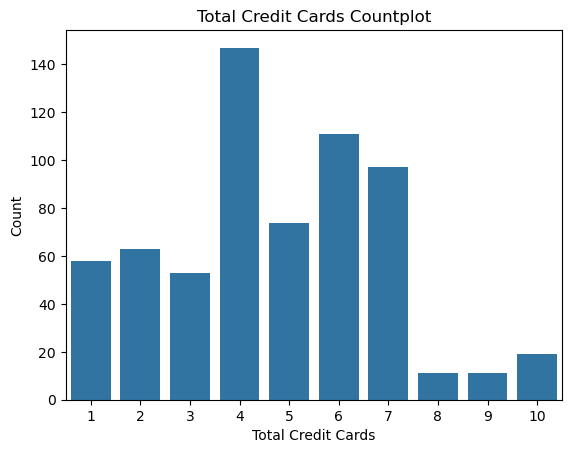

In [25]:
# Countplot for total credit cards.
sns.countplot(data = df, x = 'Total_Credit_Cards')
plt.title('Total Credit Cards Countplot')
plt.xlabel('Total Credit Cards')
plt.ylabel('Count');

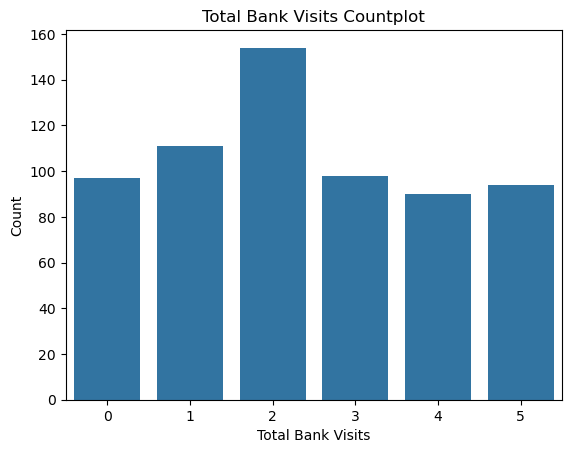

In [26]:
# Countplot for total bank visits.
sns.countplot(data = df, x = 'Total_visits_bank')
plt.title('Total Bank Visits Countplot')
plt.xlabel('Total Bank Visits')
plt.ylabel('Count');

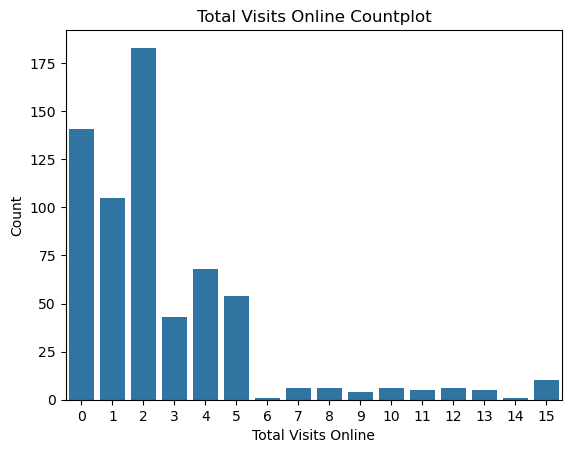

In [27]:
# Countplot for total visits online.
sns.countplot(data = df, x = 'Total_visits_online')
plt.title('Total Visits Online Countplot')
plt.xlabel('Total Visits Online')
plt.ylabel('Count');

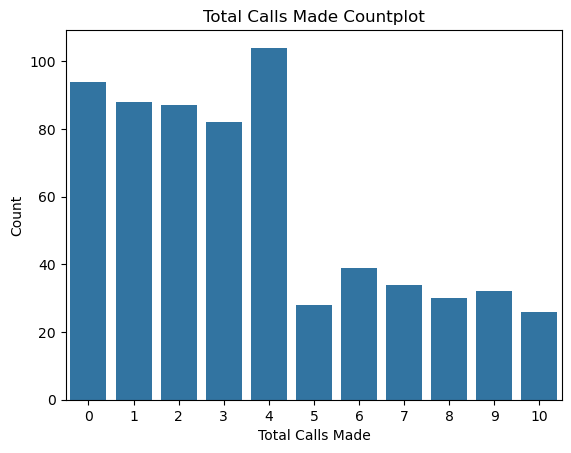

In [28]:
# Countplot for total calls made.
sns.countplot(data = df, x = 'Total_calls_made')
plt.title('Total Calls Made Countplot')
plt.xlabel('Total Calls Made')
plt.ylabel('Count');

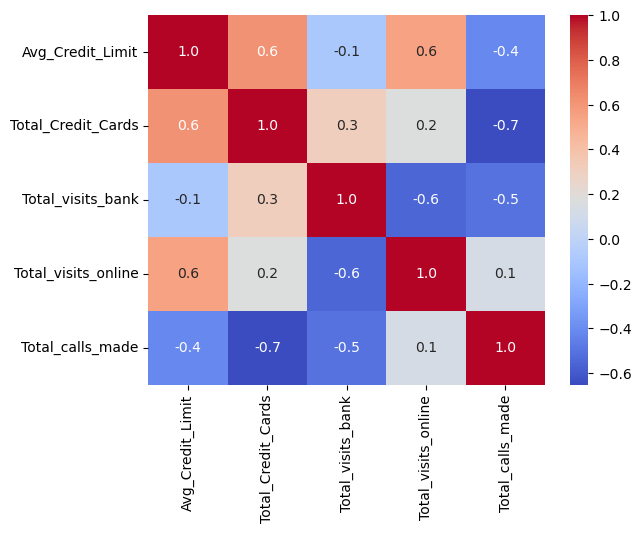

In [29]:
# Checking correlations between variables.
variables = df.columns.tolist()
corr = df[df.columns.tolist()].corr()

# Plotting the heatmap.
plt.figure()
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = '.1f',            
        xticklabels = corr.columns,            
        yticklabels = corr.columns);

**Observations:**
- Average Credit Limit: Strong right skew. Lots of outliers on the high end. Majority of the users have a credit limit of approximately 15k-50k.
- Total Credit Cards: Most common to have 4 credit cards. Having 6 and 7 credit cards are the next most common options. Small number have above 8 credit cards.
- Total Bank Visits: Number of visits range from 0-5. Most common number of visits is 2. Relatively evenly distributed.
- Total Visits Online: Most common number of visits is also 2. Right skewed. Small number of people have 7+ online visits.
- Total Calls Made: Right skewed. Most common number of calls is 4. More people on the right tail end.
- Positive correlations between:
    - Average credit limit & total credit cards and total visits online
- Negative correlations between:
    - Total credit cards & total calls made
    - Total bank visits & total visits online and total calls made
- These correlations pass the sense check. A higher credit limit is likely to be associated with more credit cards and more need to make visits online. The different channels are negatively correlated as people are likely to have a preferred channel.

#### **Scaling the data**

In [32]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)

In [33]:
# Checking scaled df.
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


#### **Applying PCA on scaled data**

In [35]:
# Creating PCA object with random state 1.
pca = PCA(n_components = scaled_df.shape[1], random_state = 1)
scaled_df_pca = pd.DataFrame(pca.fit_transform(scaled_df), columns = df.columns)
explained_variances =  pca.explained_variance_ratio_

# Copying the data to store labels.
scaled_df_pca_copy = scaled_df_pca.copy(deep = True)

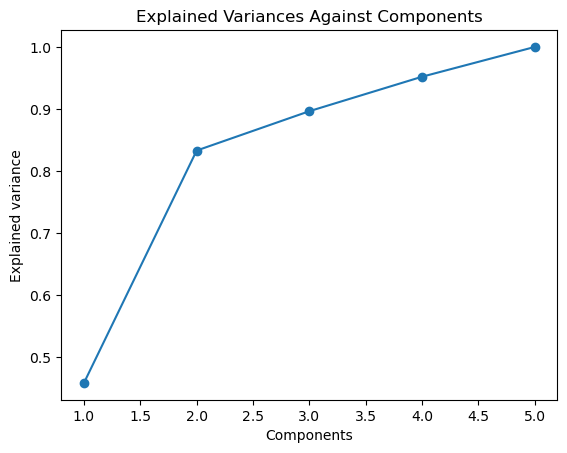

In [36]:
# Plotting number of components against variance explained.
plt.plot(range(1, 6), explained_variances.cumsum(), marker = 'o')
plt.title('Explained Variances Against Components')
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.show();

In [37]:
# Creating table showing percentage of variance explained by each principal component.
primary_components = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
explained_variances_df = pd.DataFrame(explained_variances.cumsum()*100, index = primary_components)
explained_variances_df = explained_variances_df.map(lambda x: f"{x:.2f}%")
explained_variances_df

,0
PC1,45.85%
PC2,83.30%
PC3,89.65%
PC4,95.20%
PC5,100.00%


## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

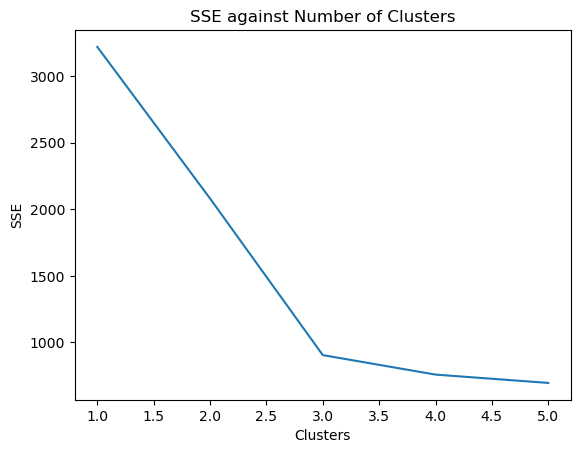

In [152]:
# Initializing a dictionary to store the Sum of Squared Error (SSE) for each K.
SSE = {}

# Running for a range of Ks and store SSE for each run.
for k in range(1,6):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(scaled_df_pca)
    SSE[k] = kmeans.inertia_

# Plotting the SSE vs K and plot the elbow curve.
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.title('SSE against Number of Clusters')
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

In [42]:
# The "elbow" is at 3. Therefore, 3 should be chosen as the value of K.
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(scaled_df_pca)

# Adding predicted labels.
scaled_df_pca_copy['KMeans_Labels'] = kmeans.predict(scaled_df_pca)
df['KMeans_Labels'] = kmeans.predict(scaled_df_pca)

# Checking how many are in each group.
df['KMeans_Labels'].value_counts()

KMeans_Labels
2    374
1    221
0     49
Name: count, dtype: int64

#### **Create the cluster profiles using the summary statistics and box plots for each label**

In [44]:
# Using groupby to find the means and medians
kmeans_means = df.groupby('KMeans_Labels').mean()
kmeans_medians = df.groupby('KMeans_Labels').median()

# Adding the means and medians to a dataframe.
summary_statistics_kmeans = pd.concat([kmeans_means, kmeans_medians], axis = 0)
summary_statistics_kmeans.index = ['Group 0 Mean', 'Group 1 Mean', 'Group 2 Mean', 'Group 0 Median', 'Group 1 Median', 'Group 2 Median']
summary_statistics_kmeans.T

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 0 Median,Group 1 Median,Group 2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0


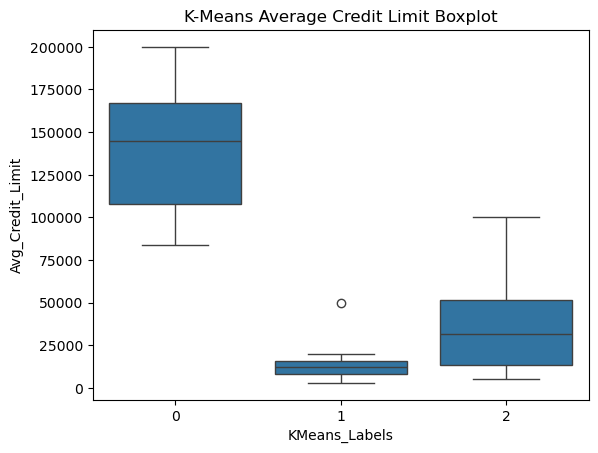

In [45]:
# Boxplots regarding each k-means label.
plt.title('K-Means Average Credit Limit Boxplot')
sns.boxplot(x = 'KMeans_Labels', y = 'Avg_Credit_Limit', data = df);

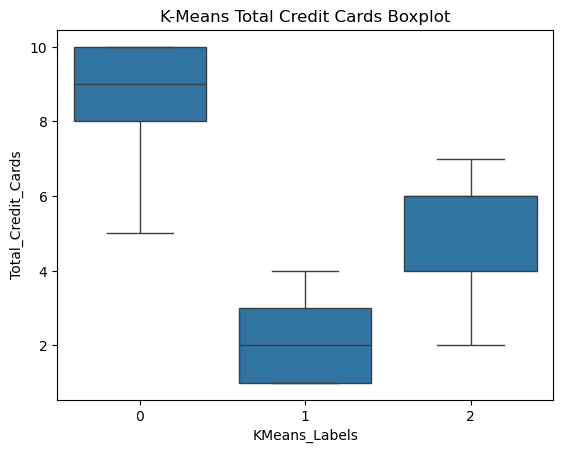

In [46]:
plt.title('K-Means Total Credit Cards Boxplot')
sns.boxplot(x = 'KMeans_Labels', y = 'Total_Credit_Cards', data = df);

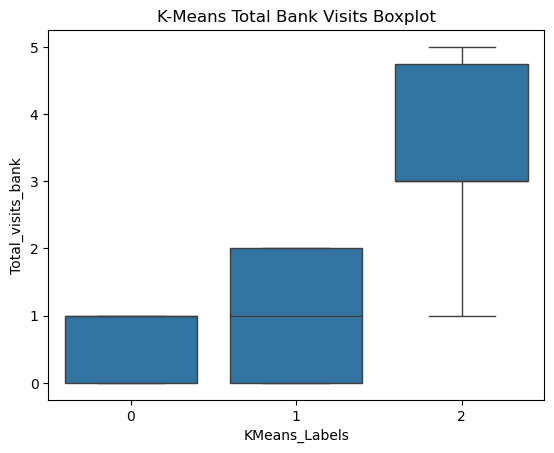

In [47]:
plt.title('K-Means Total Bank Visits Boxplot')
sns.boxplot(x = 'KMeans_Labels', y = 'Total_visits_bank', data = df);

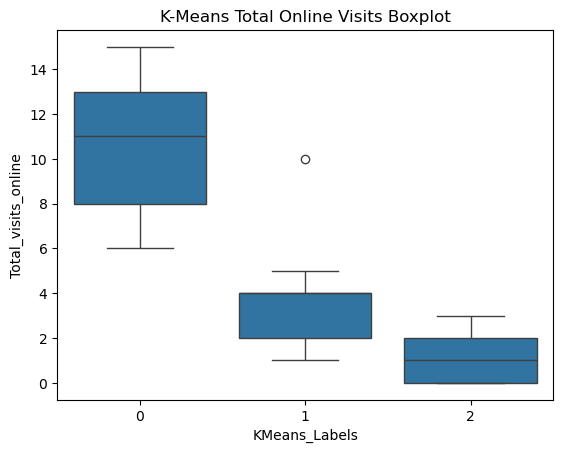

In [48]:
plt.title('K-Means Total Online Visits Boxplot')
sns.boxplot(x = 'KMeans_Labels', y = 'Total_visits_online', data = df);

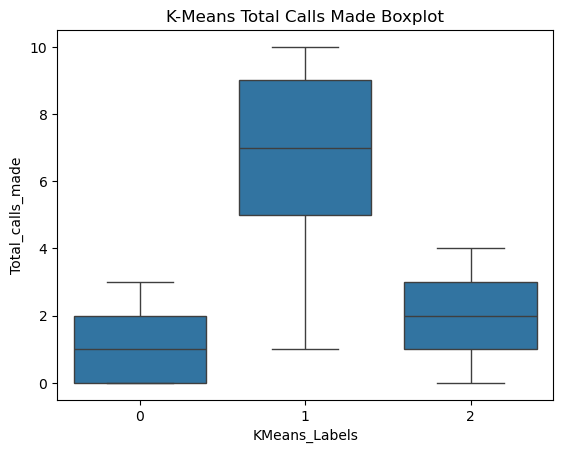

In [49]:
plt.title('K-Means Total Calls Made Boxplot')
sns.boxplot(x = 'KMeans_Labels', y = 'Total_calls_made', data = df);

**Cluster Profiles:**
- Group 0: Only 49 individuals in this cluster. Very high average credit limit, high number of total credit cards, prefer to frequently make online visits. This seems to be the elite group of credit card users who are likely to be HNWI and UHNWI.
- Group 1: There are 221 individuals in this cluster. Lower credit limit, low number of credit cards, and seem to prefer phone calls. This group seems to represent new credit card users who have few credit cards and a lower credit limit.
- Group 2: This is the largest cluster with 374 individuals. They have a slightly higher credit limit than Group 1, have multiple credit cards, and slightly prefer bank visits over other channels. This cluster is likely to be the average credit card user.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [54]:
# Applying GMM algorithm with 3 components and random state 1.

gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(scaled_df_pca)
scaled_df_pca_copy['GMM_Labels'] = gmm.predict(scaled_df_pca)
df['GMM_Labels'] = gmm.predict(scaled_df_pca)
df.GMM_Labels.value_counts()

GMM_Labels
2    374
1    221
0     49
Name: count, dtype: int64

#### **Create the cluster profiles using the summary statistics and box plots for each label**


In [56]:
# Using groupby to find the means and medians
gmm_means = df.groupby('GMM_Labels').mean()
gmm_medians = df.groupby('GMM_Labels').median()

# Adding the means and medians to a dataframe.
summary_statistics_gmm = pd.concat([gmm_means, gmm_medians], axis = 0)
summary_statistics_gmm.index = ['Group 0 Mean', 'Group 1 Mean', 'Group 2 Mean', 'Group 0 Median', 'Group 1 Median', 'Group 2 Median']
summary_statistics_gmm.T

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 0 Median,Group 1 Median,Group 2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0
KMeans_Labels,0.000000,1.000000,2.000000,0.0,1.0,2.0


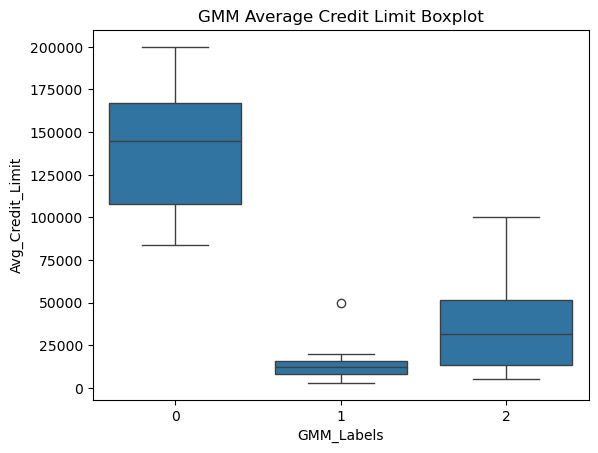

In [57]:
# Boxplots regarding each GMM label.
plt.title('GMM Average Credit Limit Boxplot')
sns.boxplot(x = 'GMM_Labels', y = 'Avg_Credit_Limit', data = df);

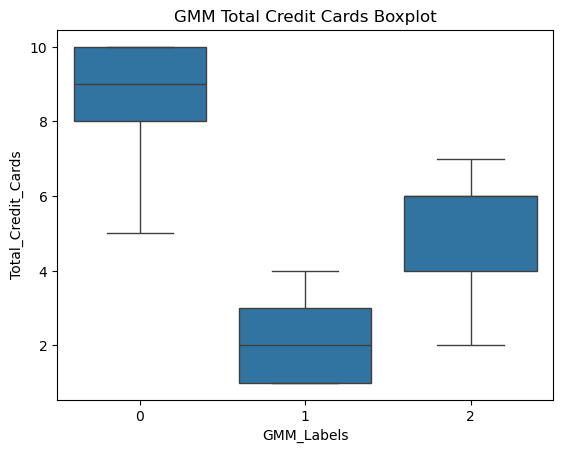

In [58]:
plt.title('GMM Total Credit Cards Boxplot')
sns.boxplot(x = 'GMM_Labels', y = 'Total_Credit_Cards', data = df);

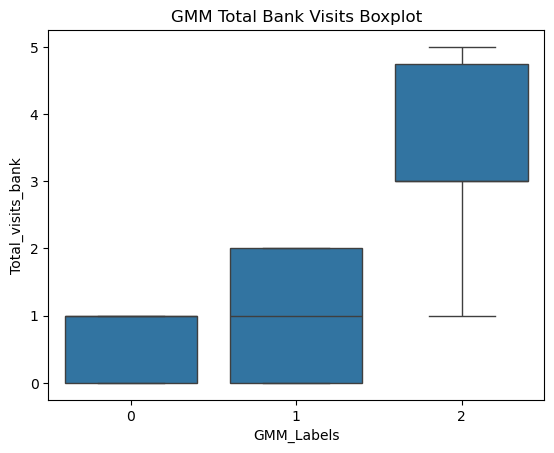

In [59]:
plt.title('GMM Total Bank Visits Boxplot')
sns.boxplot(x = 'GMM_Labels', y = 'Total_visits_bank', data = df);

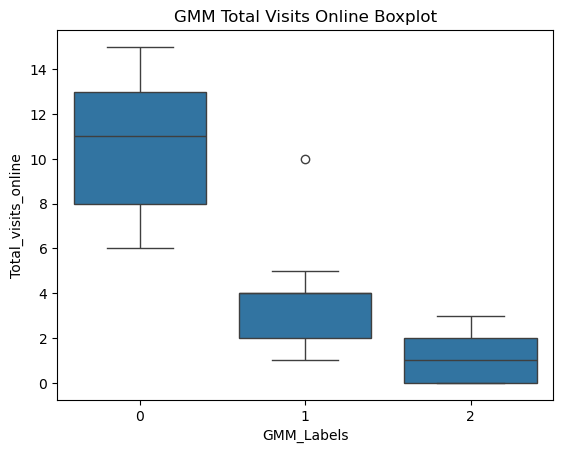

In [60]:
plt.title('GMM Total Visits Online Boxplot')
sns.boxplot(x = 'GMM_Labels', y = 'Total_visits_online', data = df);

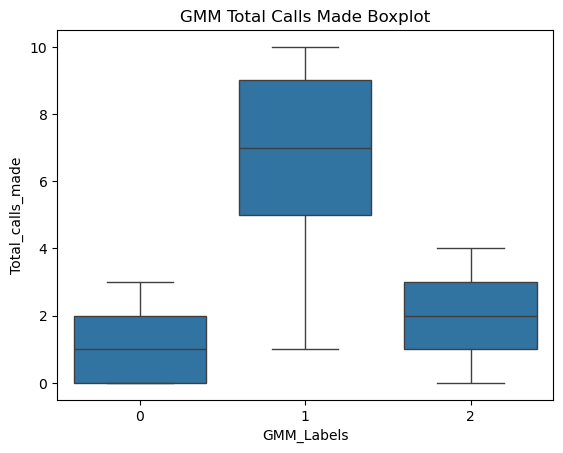

In [61]:
plt.title('GMM Total Calls Made Boxplot')
sns.boxplot(x = 'GMM_Labels', y = 'Total_calls_made', data = df);

#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

In [63]:
summary_statistics_kmeans.T

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 0 Median,Group 1 Median,Group 2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0


In [64]:
summary_statistics_gmm.T

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 0 Median,Group 1 Median,Group 2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0
KMeans_Labels,0.000000,1.000000,2.000000,0.0,1.0,2.0


**Comparing Clusters:**
- The clusters formed by K-Means and GMM appear to be identical.

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [127]:
# Applying K-Medoids clustering algorithm with 3 clusters and random state 1.
kmedoids = KMedoids(n_clusters = 3, random_state = 1)
kmedoids.fit(scaled_df_pca)
scaled_df_pca_copy['KMedoids_Labels'] = kmedoids.predict(scaled_df_pca)
df['KMedoids_Labels'] = kmedoids.predict(scaled_df_pca)
df.KMedoids_Labels.value_counts()

KMedoids_Labels
2    289
0    222
1    133
Name: count, dtype: int64

#### **Create cluster profiles using the summary statistics and box plots for each label**

In [129]:
# Using groupby to find the means and medians
kmedoids_means = df.groupby('KMedoids_Labels').mean()
kmedoids_medians = df.groupby('KMedoids_Labels').median()

# Adding the means and medians to a dataframe.
summary_statistics_kmedoids = pd.concat([kmedoids_means, kmedoids_medians], axis = 0)
summary_statistics_kmedoids.index = ['Group 0 Mean', 'Group 1 Mean', 'Group 2 Mean', 'Group 0 Median', 'Group 1 Median', 'Group 2 Median']
summary_statistics_kmedoids.T

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 0 Median,Group 1 Median,Group 2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0
KMeans_Labels,1.004505,1.263158,2.000000,1.0,2.0,2.0
GMM_Labels,1.004505,1.263158,2.000000,1.0,2.0,2.0
kmedoLabels,0.000000,1.000000,2.000000,0.0,1.0,2.0


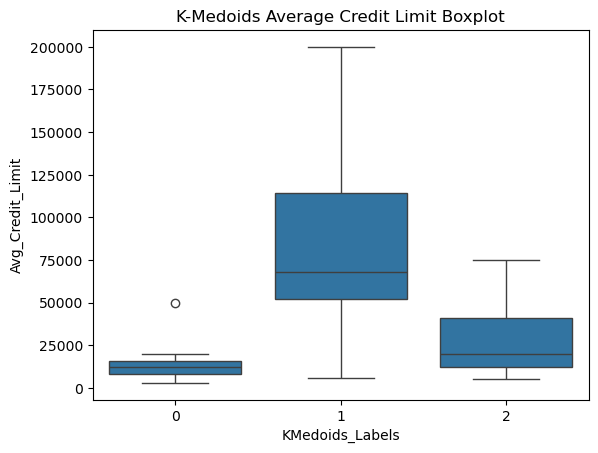

In [138]:
# Boxplots regarding each K-Medoids label.
plt.title('K-Medoids Average Credit Limit Boxplot')
sns.boxplot(x = 'KMedoids_Labels', y = 'Avg_Credit_Limit', data = df);

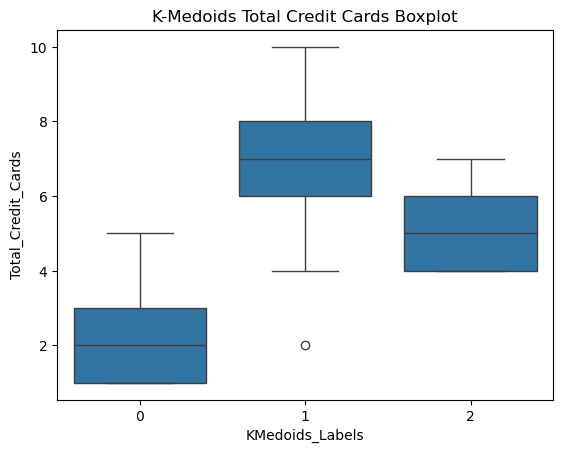

In [140]:
plt.title('K-Medoids Total Credit Cards Boxplot')
sns.boxplot(x = 'KMedoids_Labels', y = 'Total_Credit_Cards', data = df);

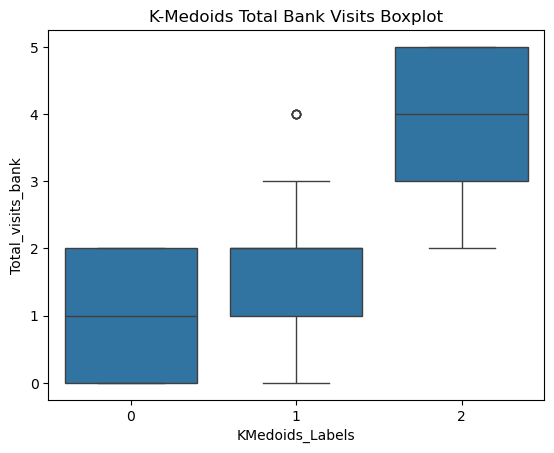

In [142]:
plt.title('K-Medoids Total Bank Visits Boxplot')
sns.boxplot(x = 'KMedoids_Labels', y = 'Total_visits_bank', data = df);

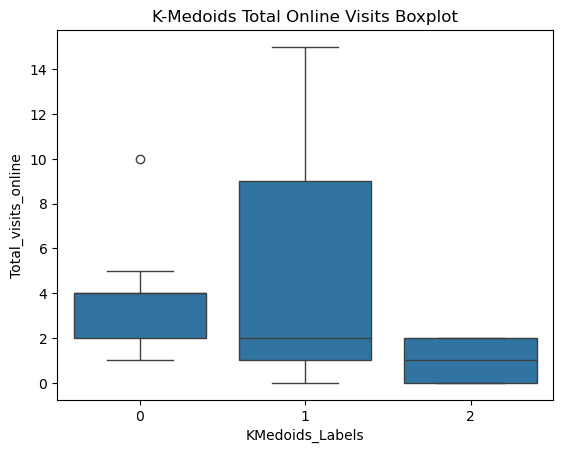

In [144]:
plt.title('K-Medoids Total Online Visits Boxplot')
sns.boxplot(x = 'KMedoids_Labels', y = 'Total_visits_online', data = df);

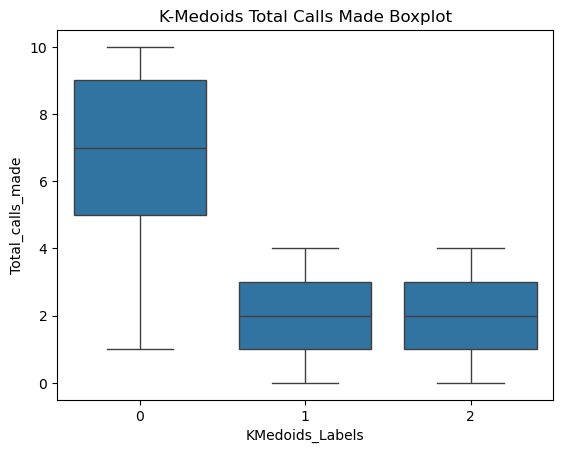

In [146]:
plt.title('K-Medoids Total Calls Made Boxplot')
sns.boxplot(x = 'KMedoids_Labels', y = 'Total_calls_made', data = df);

**Cluster Profiles:**
- Group 0: There are 222 individuals in this group. This group has a low credit limit, small number of credit cards, and prefers calling as their channel of communication. It seems that this group may comprise of new credit card users.
- Group 1: There are 133 individuals in this group. This group has a high credit limit (although not as high as the other credit limit found in Group 0 of K-Means and GMM), high number of credit cards, and use all communication channels equally. It is possible that this group comprises of experienced credit card users who are happy with all three channels.
- Group 2: There are 289 individuals in this group. This group has a slightly higher credit limit than Group 0, a median of 5 credit cards, and prefers bank visits. It seems that this group comprises of individuals with an average amount of experience with credit cards.

#### **Compare the clusters from K-Means and K-Medoids** 

In [131]:
summary_statistics_kmeans.T

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 0 Median,Group 1 Median,Group 2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0


In [133]:
summary_statistics_kmedoids.T

,Group 0 Mean,Group 1 Mean,Group 2 Mean,Group 0 Median,Group 1 Median,Group 2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0
KMeans_Labels,1.004505,1.263158,2.000000,1.0,2.0,2.0
GMM_Labels,1.004505,1.263158,2.000000,1.0,2.0,2.0
kmedoLabels,0.000000,1.000000,2.000000,0.0,1.0,2.0


**Comparing Clusters:**
- Based on the characteristics of the groups, the comparable K-Means and K-Medoids groups are:
    - K-Means Group 0 and K-Medoids Group 1
        - Given that the K-Means group has much fewer individuals and a much higher average credit limit, it seems that the K-Means group is a smaller elite (HNW and UHNW individuals) while the K-Medoids group represents a broader group of experienced credit card users. The K-Means group also strongly prefers online visits while the K-Medoids group does not have a strong preference for a channel.
    - K-Means Group 1 and K-Medoids Group 0
        - The K-Means group and K-Medoid group are identical based on their summary statistics. Both groups seem to contain less experienced credit card users with few credit cards, lower credit limit, and a preference for phone calls.
    - K-Means Group 2 and K-Medoids Group 2
        - The K-Means and K-Medoids are quite similar in that they represent a more average group of credit card users with a credit limit of $20-30k, 5-6 credit cards, and a preference for bank visits.

## **Conclusions and Business Recommendations**

- To improve the customer experience of the credit card users based on this data set, we must focus on the various communication channels customer have with the company and look to improve them.
- When looking at the entire set, it seems that the channels are equally used. However, breaking down the individuals into groups shows us different preferences of different groups.
    - Less experienced or newer credit card users seem to favour phone calls. In order to retain new customers and prevent them from turning to competitors (newer customers may be less sticky), we must prioritise improving the phone call communication channel. This could include investing in better AI to properly direct calls to the right departments or revamping the training of employees to ensure that they understand how to best deal with newer customers.
    - As a second priority, it seems that more experienced users/HNWI and UHNWI prefer to use the online channels. It is likely that this group has less time on their hands and would prefer to get issues resolved quickly online. As such, the websites for private banking should be revamped with the priority being a faster and cleaner experience.